<a href="https://colab.research.google.com/github/VARUN3WARE/bouston-housing/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "drive/MyDrive/data/boston-housing.zip" -d "drive/MyDrive/data/"

Archive:  drive/MyDrive/data/boston-housing.zip
  inflating: drive/MyDrive/data/submission_example.csv  
  inflating: drive/MyDrive/data/test.csv  
  inflating: drive/MyDrive/data/train.csv  


# BOSTON HOUSING DATASET {KAGGLE}

## Overview
In this project we would be predicting the prices of houses.

* Feature description for future reference:-
  * crim=per capita crime rate by town.

  * zn=proportion of residential land zoned for lots over 25,000 sq.ft.

  * indus=proportion of non-retail business acres per town.

  * chas=Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

  * nox=nitrogen oxides concentration (parts per 10 million).

  * rm= average number of rooms per dwelling.

  * age=proportion of owner-occupied units built prior to 1940.

  * dis=weighted mean of distances to five Boston employment centres.

  * rad=index of accessibility to radial highways.

  * tax=full-value property-tax rate per $10,000.

  * ptratio=pupil-teacher ratio by town.

  * black=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

  * lstat=lower status of the population (percent).

  * medv=median value of owner-occupied homes in $1000s.

## import neccesary tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# importing the evaluation basis i.e., RMSE
from sklearn import metrics

## importing our data that we have just downloaded through kaggle...
https://www.kaggle.com/competitions/boston-housing/overview

In [ ]:
df = pd.read_csv("drive/MyDrive/data/train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## exploring Our Dataset
excellent , now we have data on which we are going to do a little bit of analysis.

In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
# getting what type of data each column has (luckily no object string found 😊)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
# seeing if there is any null value (again we have no null values by luck 😊😊)
df.isnull().sum()#gives the total no. nulls in each column

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

## DATA VISUALIZATION
WELL, all of this data can be a little intriguing at first so let's try some visualization.

<Axes: >

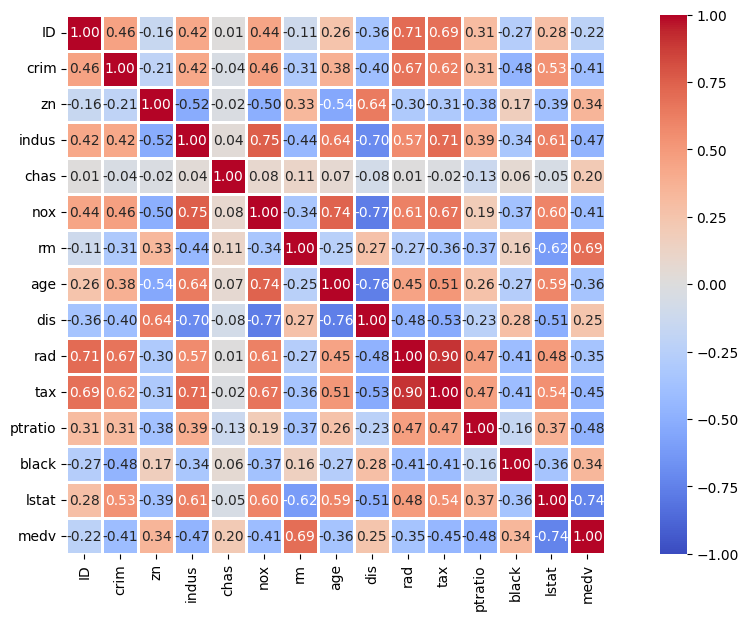

In [ ]:
# let's  see correlation btw different features in the dataset.

plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),square=True,cmap ="coolwarm",annot=True,linewidths=1,fmt=".2f")

In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

<ipython-input-48-086d38b00813>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,2,index)


Text(0.5, 1.0, 'visual')

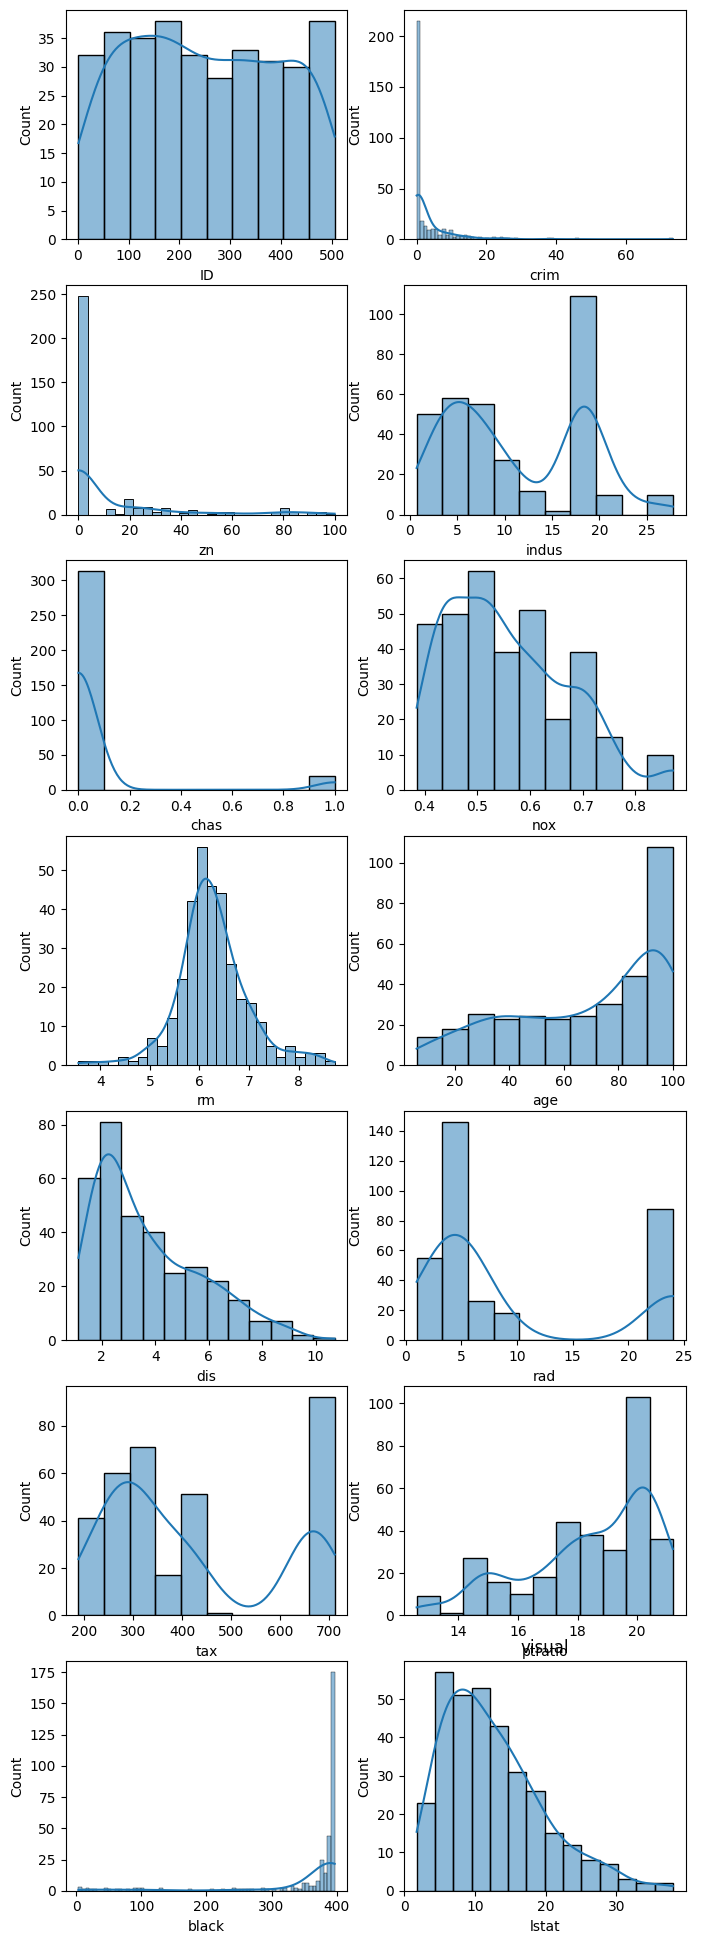

In [ ]:
df_in = ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']
plt.subplots(figsize=(8,28))
index=1
for i in df_in:
  plt.subplot(8,2,index)
  sns.histplot(df[i],kde=True)
  index +=1;
plt.title("visual")

# Getting our data ready

In [ ]:
# initiating x and y
x= df.drop("medv", axis=1)
y=df.medv

# implementing different ml models
using mindmap of sklearn
https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
#splitting data into train test dataset
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,shuffle=True)

due to some reason my root mean squared error was not working
so getting root of mean squared error on my own


## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
model_1 = ElasticNet(random_state=42)
#fitting the model
model_1.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_1.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

5.950055809466328

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
model_2 = Lasso(alpha=0.1,random_state=42)
#fitting the model
model_2.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_2.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

5.65017086732638

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# def ridge_regression():
#   model = Ridge(alpha=0.1,random_state=42)
#   return model
model_3 = Ridge(random_state=42)
#fitting the model
model_3.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_3.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

5.402093385433103

## SVR (kernel="linear")

In [ ]:
np.random.seed(42)
from sklearn.svm import SVR
model_4 = SVR(kernel='linear')
#fitting the model
model_4.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_4.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

5.749897362872468

In [ ]:
np.random.seed(42)
from sklearn.svm import SVR
model_5 = SVR(kernel='rbf')
#fitting the model
model_5.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_5.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

9.362548018185308

## Random forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_6 = RandomForestRegressor(random_state=42)
#fitting the model
model_6.fit(x_train,y_train)
#getting value of y_pred
y_pred = model_6.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

3.652336232498847

**NOTE:**As always randomforestregressor has done excellent work....
## Finding best params for our model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
ex_model=RandomForestRegressor(random_state=42)
rand_search=RandomizedSearchCV(ex_model,random_grid,verbose=2)
rand_search.fit(x_train,y_train)
rand_search.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=70, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=110, max_features=1.0, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=110, max_features=1.0, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total t

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
y_pred =rand_search.predict(x_test)
(metrics.mean_squared_error(y_test,y_pred))**(1/2)

3.9261534080500446

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    }
ex_model=RandomForestRegressor(random_state=42)
rand_search=GridSearchCV(ex_model,random_grid,cv=1,verbose=2,scoring='accuracy')
rand_search.fit(x_train,y_train)
rand_search.best_params_


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [ ]:
fin_test= pd.read_csv("drive/MyDrive/data/test.csv")
fin_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [ ]:
y_pred=model_6.predict(fin_test)


8.507522541768473

In [ ]:
y_pred=pd.Series(y_pred)
y_pred

0      34.003
1      24.418
2      16.548
3      16.161
4      17.907
        ...  
168    17.126
169    15.839
170    19.837
171    19.327
172    25.211
Length: 173, dtype: float64

In [ ]:
submit=pd.concat([fin_test.ID , y_pred], axis=1)
submit.columns=["ID","medv"]
submit.head()


,ID,medv
0,3,34.003
1,6,24.418
2,8,16.548
3,9,16.161
4,10,17.907


In [ ]:
submit.to_csv("drive/MyDrive/data/submit.csv",index=False)